<a href="https://colab.research.google.com/github/zachmakki15/IDS/blob/main/Project6_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Intro Data Science

Project #6

Problem #2

04/17/2022

#Problem #2 (R Decision Tree Model)

In [1]:
%load_ext rpy2.ipython

##Import Dataset

In [2]:
#Import the dataset in R
%%R

library(readr)
rDataFrame_Train <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv", show_col_types = FALSE)
rDataFrame_Test <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)

#Examine top of training data
head(rDataFrame_Train)

# A tibble: 6 × 5
  Approval `Debt-to-Income Ratio` `FICO Score` `Request Amount` Interest
  <lgl>                     <dbl>        <dbl>            <dbl>    <dbl>
1 FALSE                         0          397             1000      450
2 FALSE                         0          403              500      225
3 FALSE                         0          408             1000      450
4 FALSE                         0          408             2000      900
5 FALSE                         0          411             5000     2250
6 FALSE                         0          413             5000     2250


In [3]:
%%R

#Examine top of test data
head(rDataFrame_Test)

# A tibble: 6 × 5
  Approval `Debt-to-Income Ratio` `FICO Score` `Request Amount` Interest
  <lgl>                     <dbl>        <dbl>            <dbl>    <dbl>
1 FALSE                         0          413             2000      900
2 FALSE                         0          449             1000      450
3 FALSE                         0          454             6000     2700
4 FALSE                         0          456             1000      450
5 FALSE                         0          457             1000      450
6 FALSE                         0          457             8000     3600


The dataset is pre split into testing and training sets, data visualization will be done on both datasets.

##Data Visualization

In [4]:
%%R

#Summarize training data
summary(rDataFrame_Train)

  Approval       Debt-to-Income Ratio   FICO Score  Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  


In [5]:
%%R

#Summarize testing data
summary(rDataFrame_Test)

  Approval       Debt-to-Income Ratio   FICO Score    Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  


In both the training and testing sets the apporval attribute is well distributed between FALSE and TRUE. To examine the rest of the attributes distribution histograms will be used.

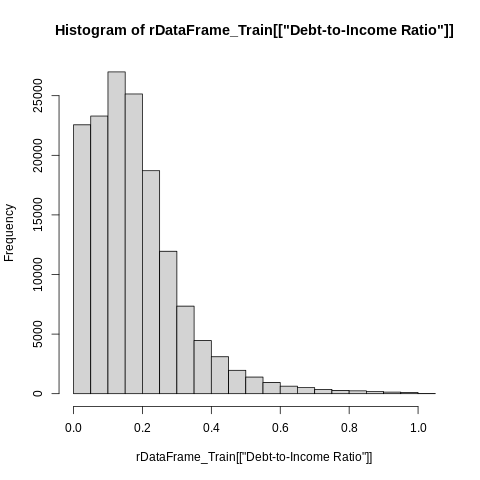

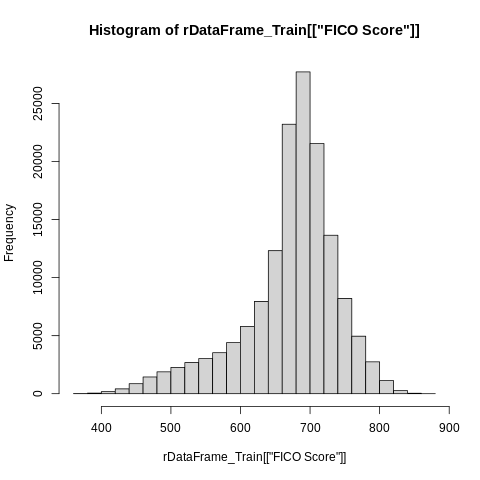

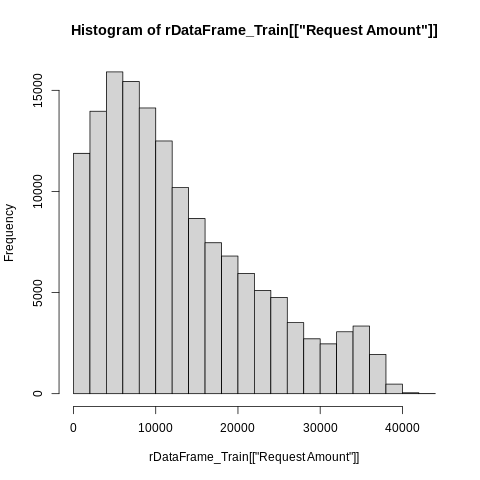

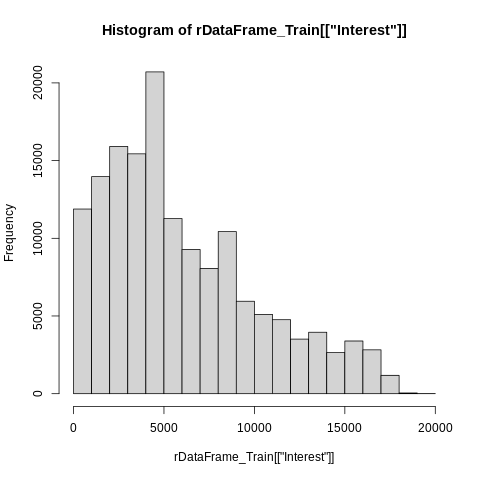

In [6]:
%%R

#Show histograms of attributes
hist(rDataFrame_Train[['Debt-to-Income Ratio']])
hist(rDataFrame_Train[['FICO Score']])
hist(rDataFrame_Train[['Request Amount']])
hist(rDataFrame_Train[['Interest']])

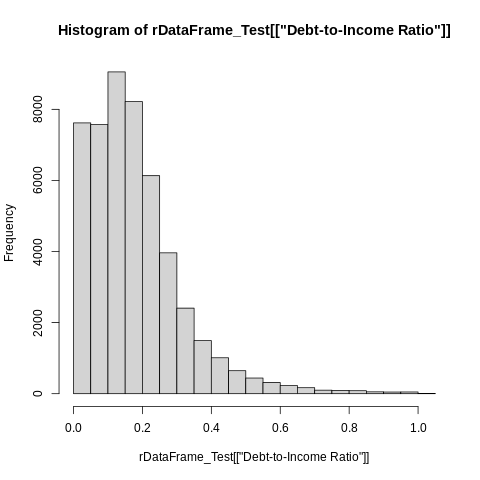

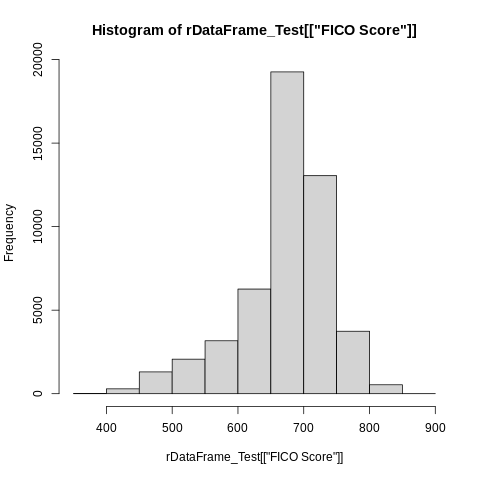

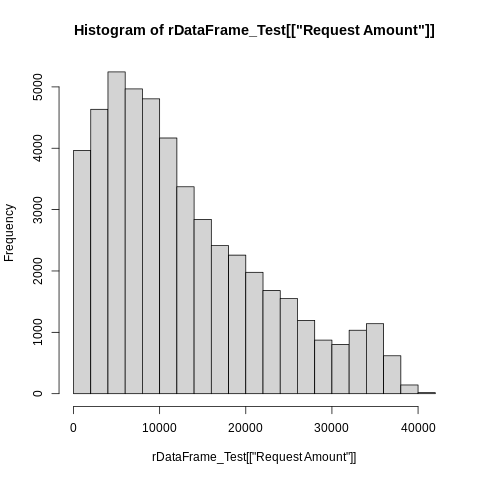

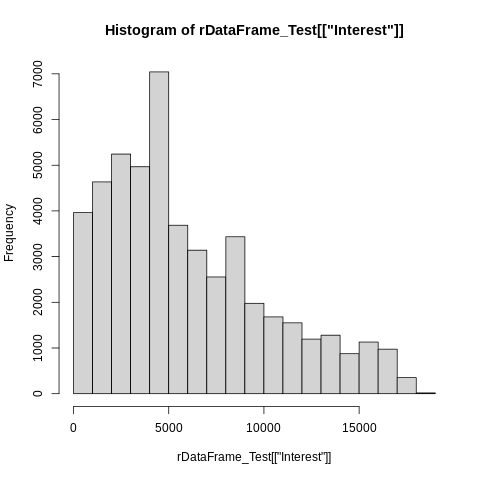

In [7]:
%%R

#Do the same for testing data
hist(rDataFrame_Test[['Debt-to-Income Ratio']])
hist(rDataFrame_Test[['FICO Score']])
hist(rDataFrame_Test[['Request Amount']])
hist(rDataFrame_Test[['Interest']])

In both the training and the testing sets the distributions of each attribute are about the same. Of the attributes Debt-to-Income-Ratio, Request Amount, and Interest are left skewed while FICO score is slightly right skewed.

##Data Cleaning

First the datasets will be checked for nulls.

In [8]:
%%R

#Use cat print command to combine multiple strings in one print statement
#Check training dataset for nulls
cat("Approval: ", sum(is.na(rDataFrame_Train[["Approval"]])), "\n")
cat("Debt-to-Income Ratio: ", sum(is.na(rDataFrame_Train[["Debt-to-Income Ratio"]])), "\n")
cat("FICO Score: ", sum(is.na(rDataFrame_Train[["FICO Score"]])), "\n")
cat("Request Amount: ", sum(is.na(rDataFrame_Train[["Request Amount"]])), "\n")
cat("Interest: ", sum(is.na(rDataFrame_Train[["Interest"]])), "\n")

Approval:  0 
Debt-to-Income Ratio:  0 
FICO Score:  0 
Request Amount:  0 
Interest:  0 


In [9]:
%%R

#Check training dataset for nulls
cat("Approval: ", sum(is.na(rDataFrame_Test[["Approval"]])), "\n")
cat("Debt-to-Income Ratio: ", sum(is.na(rDataFrame_Test[["Debt-to-Income Ratio"]])), "\n")
cat("FICO Score: ", sum(is.na(rDataFrame_Test[["FICO Score"]])), "\n")
cat("Request Amount: ", sum(is.na(rDataFrame_Test[["Request Amount"]])), "\n")
cat("Interest: ", sum(is.na(rDataFrame_Test[["Interest"]])), "\n")

Approval:  0 
Debt-to-Income Ratio:  0 
FICO Score:  0 
Request Amount:  0 
Interest:  0 


There are no NULLS in either the training or testing dataset therefore no imputing is needed. The Target column Approval needs to be convereted to numeric categoric (ordinal). To do the encoding a function will be created to do a simple ordinal encoding of a categoric column.

In [10]:
%%R

#Ordinal encoding function
encode_ordinal <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}

#Encode train approval
rDataFrame_Train[['Approval']] = encode_ordinal(rDataFrame_Train[['Approval']])
#Factorize train approval
rDataFrame_Train[['Approval']] = factor(rDataFrame_Train[['Approval']])
head(rDataFrame_Train)

# A tibble: 6 × 5
  Approval `Debt-to-Income Ratio` `FICO Score` `Request Amount` Interest
  <fct>                     <dbl>        <dbl>            <dbl>    <dbl>
1 1                             0          397             1000      450
2 1                             0          403              500      225
3 1                             0          408             1000      450
4 1                             0          408             2000      900
5 1                             0          411             5000     2250
6 1                             0          413             5000     2250


In [11]:
%%R

#Show the dataset will approval encoded
summary(rDataFrame_Train)

 Approval  Debt-to-Income Ratio   FICO Score  Request Amount     Interest    
 1:75066   Min.   :0.0000       Min.   :371   Min.   :  500   Min.   :  225  
 2:75236   1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000   1st Qu.: 2700  
           Median :0.1600       Median :684   Median :11000   Median : 4950  
           Mean   :0.1835       Mean   :672   Mean   :13427   Mean   : 6042  
           3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000   3rd Qu.: 8550  
           Max.   :1.0300       Max.   :869   Max.   :44000   Max.   :19800  


In [12]:
%%R

#Do the same for testing data
rDataFrame_Test[['Approval']] = encode_ordinal(rDataFrame_Test[['Approval']])
rDataFrame_Test[['Approval']] = factor(rDataFrame_Test[['Approval']])
head(rDataFrame_Test)

# A tibble: 6 × 5
  Approval `Debt-to-Income Ratio` `FICO Score` `Request Amount` Interest
  <fct>                     <dbl>        <dbl>            <dbl>    <dbl>
1 1                             0          413             2000      900
2 1                             0          449             1000      450
3 1                             0          454             6000     2700
4 1                             0          456             1000      450
5 1                             0          457             1000      450
6 1                             0          457             8000     3600


In [13]:
%%R

#Show the dataset with approval encoded
summary(rDataFrame_Test)

 Approval  Debt-to-Income Ratio   FICO Score    Request Amount     Interest    
 1:24934   Min.   :0.0000       Min.   :372.0   Min.   :  500   Min.   :  225  
 2:24764   1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000   1st Qu.: 2700  
           Median :0.1600       Median :684.0   Median :11000   Median : 4950  
           Mean   :0.1831       Mean   :672.3   Mean   :13413   Mean   : 6036  
           3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000   3rd Qu.: 8550  
           Max.   :1.0500       Max.   :866.0   Max.   :42000   Max.   :18900  


Now the approval attribute is encoded for both the training and testing set and the data is ready to be fed to a decision tree.

##Decision Trees

To create decision trees the rpart library will be imported.

In [14]:
%%R

library(rpart)

rpart is used to build both gini and entropy (referred to as information) trees. By design rpart limits the depth of a tree as much as possible. To bypass this a parameter can be added cp=-1, but when this is added the tree becomes far to big to analyze with the fancyRpartPlot method. 

In [36]:
%%R

#Create gini decision tree
set.seed(42)
giniTree <- rpart(
  rDataFrame_Train[['Approval']] ~ rDataFrame_Train[['Debt-to-Income Ratio']] + rDataFrame_Train[['FICO Score']] 
  + rDataFrame_Train[['Request Amount']] + rDataFrame_Train[['Interest']], 
  data = rDataFrame_Train, 
  method = "class",
  parms = list(split = "gini")
)

The minbucket parameter is used to specify the min number of cases in a terminal node.

In [38]:
%%R

#Create entropy decision tree
entropyTree <- rpart(
  rDataFrame_Train[['Approval']] ~ rDataFrame_Train[['Debt-to-Income Ratio']] + rDataFrame_Train[['FICO Score']] 
  + rDataFrame_Train[['Request Amount']] + rDataFrame_Train[['Interest']], 
  data = rDataFrame_Train, 
  method = "class",
  parms = list(split = "information"),
  minbucket = 1000
)

To better visualize the rpart decision trees the packages rpart.plot and rattle will be installed to gain access to the fancyRpartPlot method, which plots the decision tree in a readable way.

In [17]:
%%R

install.packages("rpart.plot")
library(rpart.plot)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart.plot_3.1.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 672013 bytes (656 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [18]:
%%R

install.packages("rattle")
library(rattle)
library(rpart.plot)
library(RColorBrewer)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rattle_5.5.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3904458 bytes (3.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

Now that the packages have been imported the trees will be visualized.

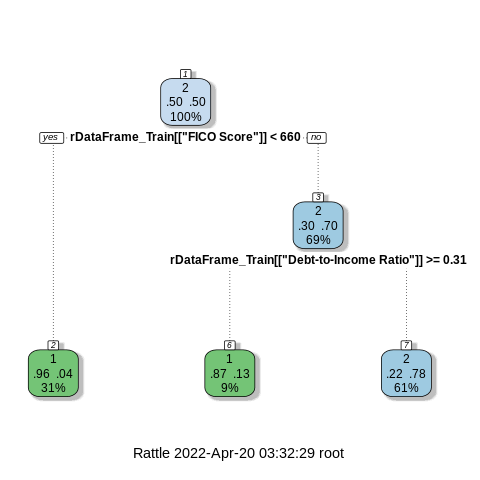

In [37]:
%%R

fancyRpartPlot(giniTree)

The gini tree uses FICO score as its root node and splits on FICO score < 660. From there anything lesss then this number is classified as a 1. The next split is on FICO scores greater then 660 and Debt-to-Income Ratio >= .31. Anything over 0.31 is classified as a 1 while anything under it is classified as a 0.

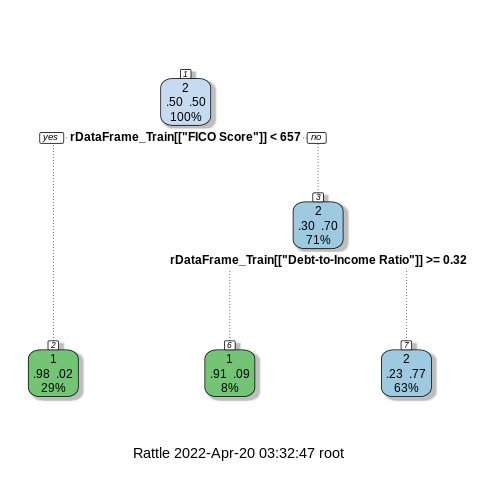

In [39]:
%%R

fancyRpartPlot(entropyTree)

The results for the entropy tree are almost identical to that of the gini tree. The only difference is in the gini tree the splitting critiera for the root node FICO score was 660 while in the entropy tree it is 657. The other difference is in the splitting critiera for Debt-to-Income ratio, in the gini tree it was 0.31 while in the entropy it is 0.32. 

In [30]:
%%R

#Get training accuracy
printcp(giniTree)


Classification tree:
rpart(formula = rDataFrame_Train[["Approval"]] ~ rDataFrame_Train[["Debt-to-Income Ratio"]] + 
    rDataFrame_Train[["FICO Score"]] + rDataFrame_Train[["Request Amount"]] + 
    rDataFrame_Train[["Interest"]], data = rDataFrame_Train, 
    method = "class", parms = list(split = "gini"), minsplit = 2)

Variables actually used in tree construction:
[1] rDataFrame_Train[["Debt-to-Income Ratio"]]
[2] rDataFrame_Train[["FICO Score"]]          

Root node error: 75066/150302 = 0.49943

n= 150302 

       CP nsplit rel error  xerror      xstd
1 0.56465      0   1.00000 1.00226 0.0025823
2 0.12676      1   0.43535 0.43535 0.0021304
3 0.01000      2   0.30860 0.30946 0.0018669


By default the rpart decision tree runs cross folds validation on itself, the table at the bottom of the print statement displays statistics from that cross validation, with the most important being rel_error which is the relative error of the fold. In the final fold of the gini tree the relative error is 0.3086 or about 31%.

In [31]:
%%R

#Get training accuracy
printcp(entropyTree)


Classification tree:
rpart(formula = rDataFrame_Train[["Approval"]] ~ rDataFrame_Train[["Debt-to-Income Ratio"]] + 
    rDataFrame_Train[["FICO Score"]] + rDataFrame_Train[["Request Amount"]] + 
    rDataFrame_Train[["Interest"]], data = rDataFrame_Train, 
    method = "class", parms = list(split = "information"), minsplit = 2, 
    minbucket = 1000)

Variables actually used in tree construction:
[1] rDataFrame_Train[["Debt-to-Income Ratio"]]
[2] rDataFrame_Train[["FICO Score"]]          

Root node error: 75066/150302 = 0.49943

n= 150302 

       CP nsplit rel error  xerror      xstd
1 0.55377      0   1.00000 1.00000 0.0025823
2 0.13033      1   0.44623 0.44623 0.0021494
3 0.01000      2   0.31591 0.31591 0.0018827


In the entropy tree the cross validation relative error is also about 31%.

##Summary

In summary both the gini decision tree which did not specify a minimum bucket (minimum cases per terminal node) and the entropy tree which did were almost identical, with the only difference being slight varaitions in the numeric values to split on as described above. This could be due to multiple reasons, this dataset may be simple and the difference between entropy and gini makes no difference as it is obvious that FICO score will always be the root, it could also be due to the library I choose to use for creating the decision tree. Rpart seemeed like a popular choose from the research I did, but it could be doing something that I am unaware of which is causing the entropy and gini trees to be the same. 